# Project 5

In [54]:
#imports
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df_accident = pd.read_csv('./data/accident.csv')

In [3]:
df_accident.columns = df_accident.columns.str.lower()

In [4]:
df_accident.head()

,state,statename,st_case,ve_total,ve_forms,pvh_invl,peds,persons,permvit,pernotmvit,...,arr_hour,arr_hourname,arr_min,arr_minname,hosp_hr,hosp_hrname,hosp_mn,hosp_mnname,fatals,drunk_dr
0,1,Alabama,10001,1,1,0,0,4,4,0,...,3,3:00am-3:59am,10,10,99,Unknown,99,Unknown EMS Hospital Arrival Time,3,1
1,1,Alabama,10002,4,4,0,0,6,6,0,...,17,5:00pm-5:59pm,26,26,99,Unknown,99,Unknown EMS Hospital Arrival Time,1,0
2,1,Alabama,10003,2,2,0,0,2,2,0,...,15,3:00pm-3:59pm,15,15,99,Unknown,99,Unknown EMS Hospital Arrival Time,1,0
3,1,Alabama,10004,1,1,0,0,5,5,0,...,99,Unknown EMS Scene Arrival Hour,99,Unknown EMS Scene Arrival Minutes,99,Unknown,99,Unknown EMS Hospital Arrival Time,1,0
4,1,Alabama,10005,1,1,0,0,1,1,0,...,0,0:00am-0:59am,55,55,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),1,0


In [173]:
df_accident['weather'].unique()

array([ 1,  2, 10,  5, 99, 12,  4, 98, 11,  3,  6,  7,  8], dtype=int64)

In [39]:
#c19
df_accident[['harm_ev', 'arr_hour']]
#lets take a look at the particular hour and how thw vehicle crashed(the type of collision/harm). 

,harm_ev,arr_hour
0,42,3
1,12,17
2,34,15
3,42,99
4,42,0
...,...,...
35761,12,16
35762,12,18
35763,12,17
35764,12,20


In [40]:
df_accident[['harm_ev', 'arr_hour']].corr()
#The correlation between these two features seems to be pretty weak as I thought there would be more to unpack here.

,harm_ev,arr_hour
harm_ev,1.000000,-0.018754
arr_hour,-0.018754,1.000000


In [44]:
df_accident[['wrk_zone', 'lgt_cond']].corr()

,wrk_zone,lgt_cond
wrk_zone,1.000000,-0.000052
lgt_cond,-0.000052,1.000000


In [47]:
df_accident['wrk_zone'].unique()

array([0, 2, 1, 4, 3], dtype=int64)

In [48]:
df_accident['lgt_cond'].unique()

array([2, 3, 1, 5, 4, 9, 6, 8, 7], dtype=int64)

In [51]:
df_accident.groupby('fatals')[['lgt_cond', 'wrk_zone']].describe().T

fatals                     1            2           3          4          5  \
lgt_cond count  33226.000000  2154.000000  289.000000  71.000000  20.000000   
         mean       1.967525     1.861653    1.951557   2.056338   1.650000   
         std        1.229484     1.111267    1.144616   1.297110   0.933302   
         min        1.000000     1.000000    1.000000   1.000000   1.000000   
         25%        1.000000     1.000000    1.000000   1.000000   1.000000   
         50%        2.000000     2.000000    2.000000   2.000000   1.000000   
         75%        3.000000     2.000000    3.000000   3.000000   2.000000   
         max        9.000000     9.000000    8.000000   9.000000   4.000000   
wrk_zone count  33226.000000  2154.000000  289.000000  71.000000  20.000000   
         mean       0.046741     0.059424    0.038062   0.014085   0.250000   
         std        0.379156     0.421438    0.303803   0.118678   0.910465   
         min        0.000000     0.000000    0.000000   0.000000   0.000000   
         25%        0.000000     0.000000    0.000000   0.000000   0.000000   
         50%        0.000000     0.000000    0.000000   0.000000   0.000000   
         75%        0.000000     0.000000    0.000000   0.000000   0.000000   
         max        4.000000     4.000000    4.000000   1.000000   4.000000   

fatals                 6    7    8  
lgt_cond count  4.000000  1.0  1.0  
         mean   2.250000  3.0  1.0  
         std    1.258306  NaN  NaN  
         min    1.000000  3.0  1.0  
         25%    1.750000  3.0  1.0  
         50%    2.000000  3.0  1.0  
         75%    2.500000  3.0  1.0  
         max    4.000000  3.0  1.0  
wrk_zone count  4.000000  1.0  1.0  
         mean   0.000000  0.0  0.0  
         std    0.000000  NaN  NaN  
         min    0.000000  0.0  0.0  
         25%    0.000000  0.0  0.0  
         50%    0.000000  0.0  0.0  
         75%    0.000000  0.0  0.0  
         max    0.000000  0.0  0.0

In [62]:
df_accident['fatals'].unique()

array([3, 1, 2, 4, 8, 6, 5, 7], dtype=int64)

In [63]:
df_accident['persons'].unique()

array([ 4,  6,  2,  5,  1,  3,  7, 21, 13,  8,  9,  0, 11, 10, 17, 19, 15,
       16, 14, 24, 12, 26, 22, 28, 61, 20, 31], dtype=int64)

In [72]:
fatals_chart = df_accident.sort_values(by= 'fatals', ascending=False)[:12]

In [78]:
fatals_chart.head(20)

,state,statename,st_case,ve_total,ve_forms,pvh_invl,peds,persons,permvit,pernotmvit,...,arr_hour,arr_hourname,arr_min,arr_minname,hosp_hr,hosp_hrname,hosp_mn,hosp_mnname,fatals,drunk_dr
6236,8,Colorado,80224,2,2,0,0,8,8,0,...,99,Unknown EMS Scene Arrival Hour,99,Unknown EMS Scene Arrival Minutes,99,Unknown,99,Unknown EMS Hospital Arrival Time,8,0
31654,48,Texas,482030,1,1,0,0,10,10,0,...,99,Unknown EMS Scene Arrival Hour,99,Unknown EMS Scene Arrival Minutes,99,Unknown,99,Unknown EMS Hospital Arrival Time,7,1
32850,48,Texas,483256,2,2,0,0,9,9,0,...,99,Unknown EMS Scene Arrival Hour,99,Unknown EMS Scene Arrival Minutes,99,Unknown,99,Unknown EMS Hospital Arrival Time,6,0
9671,12,Florida,122861,2,2,0,0,6,6,0,...,99,Unknown EMS Scene Arrival Hour,99,Unknown EMS Scene Arrival Minutes,99,Unknown,99,Unknown EMS Hospital Arrival Time,6,0
10319,13,Georgia,130222,2,2,0,0,6,6,0,...,2,2:00am-2:59am,15,15,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),6,0
14279,20,Kansas,200181,2,2,0,0,8,8,0,...,19,7:00pm-7:59pm,1,1,20,8:00pm-8:59pm,8,8,6,0
27982,45,South Carolina,450518,3,3,0,0,9,9,0,...,99,Unknown EMS Scene Arrival Hour,99,Unknown EMS Scene Arrival Minutes,99,Unknown,99,Unknown EMS Hospital Arrival Time,5,0
31348,48,Texas,481716,2,2,0,0,8,8,0,...,99,Unknown EMS Scene Arrival Hour,99,Unknown EMS Scene Arrival Minutes,99,Unknown,99,Unknown EMS Hospital Arrival Time,5,0
20002,30,Montana,300050,2,2,0,0,5,5,0,...,20,8:00pm-8:59pm,30,30,21,9:00pm-9:59pm,9,9,5,2
22015,36,New York,360377,2,2,0,0,7,7,0,...,17,5:00pm-5:59pm,35,35,99,Unknown,99,Unknown EMS Hospital Arrival Time,5,0


In [124]:
fatals_chart['month'].unique()

array([ 6, 11,  2,  7], dtype=int64)

Text(0.5, 1.0, 'Chart of fatalities & month')

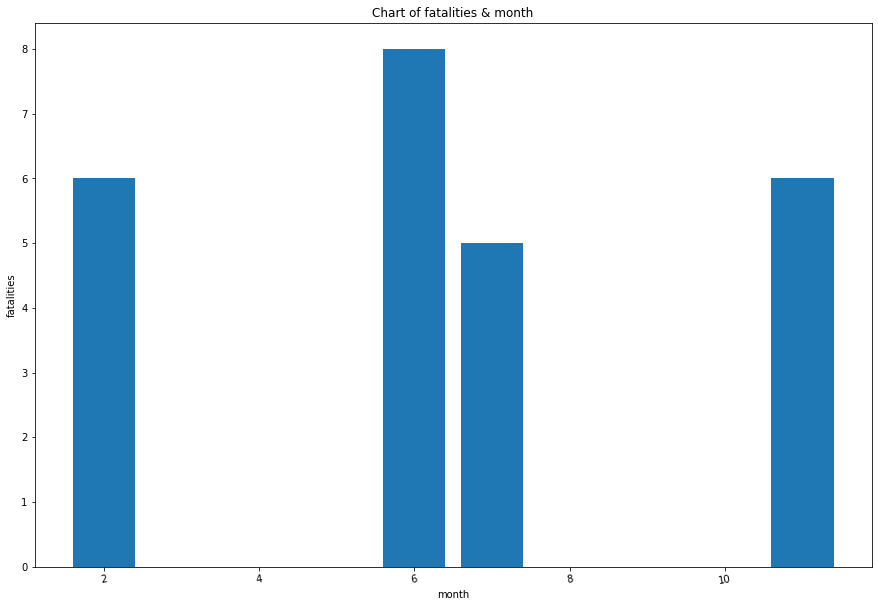

In [122]:
# Plot Fatals
plt.figure(figsize=(15,10))
plt.bar(fatals_chart['month'],
       fatals_chart['fatals'])
plt.xticks(rotation = 10)
plt.ylabel('fatalities')
plt.xlabel('month')
plt.title('Chart of fatalities & month')
        

In [8]:
df_accident.shape

(35766, 81)

In [135]:
df_accident[['day_week']].head()

,day_week
0,4
1,5
2,5
3,6
4,7


In [137]:
df_accident['month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 11, 10, 12], dtype=int64)

In [138]:
df_accident['day'].unique()

array([ 1,  2,  3,  4,  7,  8,  9, 10, 11, 13, 14, 15, 16, 17, 18, 12,  6,
        5, 28, 19, 21, 22, 23, 26, 25, 27, 29, 30, 31, 20, 24],
      dtype=int64)

In [139]:
df_accident['day_week'].unique()

array([4, 5, 6, 7, 3, 2, 1], dtype=int64)

In [10]:
df_accident.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35766 entries, 0 to 35765
Data columns (total 81 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   state         35766 non-null  int64  
 1   statename     35766 non-null  object 
 2   st_case       35766 non-null  int64  
 3   ve_total      35766 non-null  int64  
 4   ve_forms      35766 non-null  int64  
 5   pvh_invl      35766 non-null  int64  
 6   peds          35766 non-null  int64  
 7   persons       35766 non-null  int64  
 8   permvit       35766 non-null  int64  
 9   pernotmvit    35766 non-null  int64  
 10  county        35766 non-null  int64  
 11  countyname    35766 non-null  object 
 12  city          35766 non-null  int64  
 13  cityname      35766 non-null  object 
 14  day           35766 non-null  int64  
 15  dayname       35766 non-null  int64  
 16  month         35766 non-null  int64  
 17  monthname     35766 non-null  object 
 18  year          35766 non-nu

In [13]:
df_accident.isna().sum()

state          0
statename      0
st_case        0
ve_total       0
ve_forms       0
              ..
hosp_hrname    0
hosp_mn        0
hosp_mnname    0
fatals         0
drunk_dr       0
Length: 81, dtype: int64

In [131]:
df_accident.drop(columns='tway_id2', inplace=True)

In [76]:
df_accident['drunk_dr'].unique()

array([1, 0, 2, 3, 4], dtype=int64)

In [77]:
df_accident[['drunk_dr', 'fatals']].corr()
#the correlation between fatality and drunk driving is low

,drunk_dr,fatals
drunk_dr,1.000000,0.048722
fatals,0.048722,1.000000


In [133]:
# deleted this column for data cleaning purposes
#df_accident['tway_id2'].unique()

In [21]:
df_accident.describe()

,state,st_case,ve_total,ve_forms,pvh_invl,peds,persons,permvit,pernotmvit,county,...,weather,sch_bus,not_hour,not_min,arr_hour,arr_min,hosp_hr,hosp_mn,fatals,drunk_dr
count,35766.000000,35766.000000,35766.000000,35766.000000,35766.000000,35766.000000,35766.000000,35766.000000,35766.000000,35766.000000,...,35766.000000,35766.000000,35766.000000,35766.000000,35766.000000,35766.000000,35766.000000,35766.000000,35766.000000,35766.000000
mean,27.158307,272387.092937,1.560113,1.517419,0.042694,0.228485,2.172818,2.162585,0.238718,93.060421,...,9.724683,0.001426,61.393642,68.456439,61.884387,68.736901,77.587765,80.760583,1.085500,0.266426
std,16.354713,163438.330390,0.782449,0.736814,0.292877,0.470604,1.593437,1.589051,0.494223,98.691960,...,25.543251,0.037735,42.613391,36.188582,42.549598,36.144762,32.738110,27.561744,0.342381,0.459707
min,1.000000,10001.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,12.000000,122077.500000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,31.000000,...,1.000000,0.000000,16.000000,34.000000,16.000000,34.000000,88.000000,88.000000,1.000000,0.000000
50%,26.000000,260916.500000,1.000000,1.000000,0.000000,0.000000,2.000000,2.000000,0.000000,71.000000,...,1.000000,0.000000,99.000000,98.000000,99.000000,98.000000,88.000000,88.000000,1.000000,0.000000
75%,42.000000,420476.750000,2.000000,2.000000,0.000000,0.000000,3.000000,3.000000,0.000000,117.000000,...,2.000000,0.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,1.000000,1.000000
max,56.000000,560115.000000,15.000000,15.000000,10.000000,8.000000,61.000000,61.000000,9.000000,999.000000,...,99.000000,1.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,8.000000,4.000000


In [22]:
df_accident[['fatals', 'day_week']]

,fatals,day_week
0,3,4
1,1,5
2,1,5
3,1,6
4,1,7
...,...,...
35761,1,7
35762,2,6
35763,1,6
35764,1,3


In [23]:
df_accident[['fatals', 'day_week']].corr()

,fatals,day_week
fatals,1.000000,0.004305
day_week,0.004305,1.000000


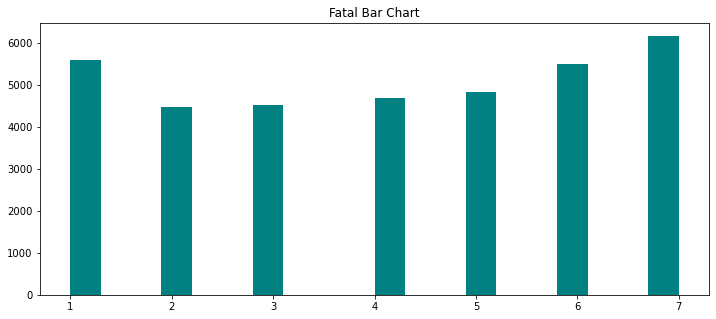

In [141]:
plt.figure(figsize=(12,5))
# Size

# Plot it
plt.hist(df_accident['day_week'], bins=20, color='teal');



plt.title('Fatal Bar Chart');


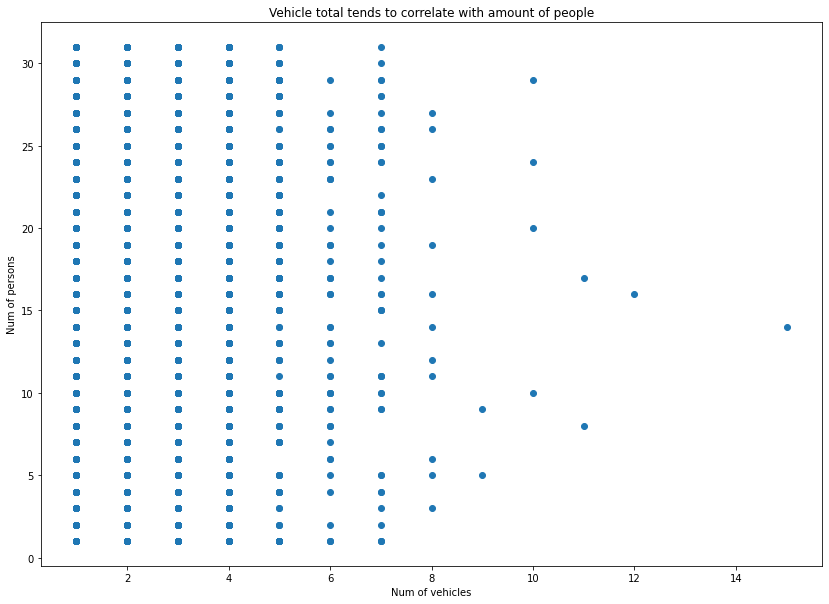

In [146]:
plt.figure(figsize=(14,10))
# Scatter plot
plt.scatter(df_accident['ve_total'],df_accident['day'])

# Create a descriptive title
plt.title('Vehicle total tends to correlate with amount of people')
# Add axis labels
plt.xlabel('Num of vehicles')
plt.ylabel('Num of persons');

#### Vehicle Total and Persons analysis

In [80]:
df_accident[['ve_total', 'persons']].head()
#pretty strong correlation here but hard to extract value
#lets plot this to see if there is any other information that can be extracted

,ve_total,persons
0,1,4
1,4,6
2,2,2
3,1,5
4,1,1


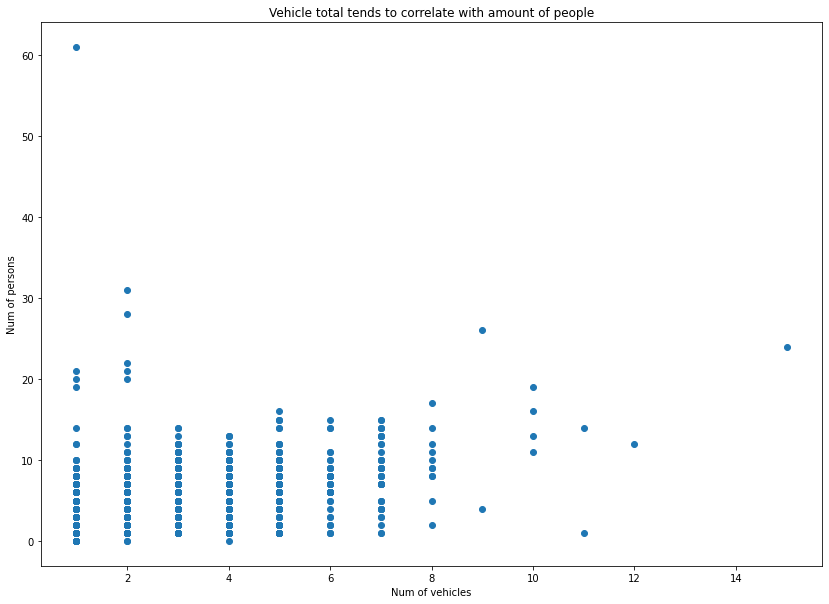

In [82]:
# There looks to be a few outliers partcularly with the 60 person crash further analysis is needed with that as well as with the #of vehicles above 8
plt.figure(figsize=(14,10))
# Scatter plot
plt.scatter(df_accident['ve_total'],df_accident['persons'])
# Create a descriptive title
plt.title('Vehicle total tends to correlate with amount of people')
# Add axis labels
plt.xlabel('Num of vehicles')
plt.ylabel('Num of persons');

In [79]:
df_accident[['ve_total', 'persons']].corr()
#pretty strong correlation here but hard to extract value

,ve_total,persons
ve_total,1.000000,0.631536
persons,0.631536,1.000000


In [84]:
df_accident[df_accident['persons'] > 40]
# What does this mean?
# Looks like there is a data error - interpretation of the charts is also unclear

,state,statename,st_case,ve_total,ve_forms,pvh_invl,peds,persons,permvit,pernotmvit,...,arr_hour,arr_hourname,arr_min,arr_minname,hosp_hr,hosp_hrname,hosp_mn,hosp_mnname,fatals,drunk_dr
26452,42,Pennsylvania,420105,1,1,0,0,61,61,0,...,3,3:00am-3:59am,49,49,4,4:00am-4:59am,41,41,1,0


In [85]:
df_accident[df_accident['ve_total'] > 8]
# Seems to be one outlier in the seond row where ve-total and ve form do not align

,state,statename,st_case,ve_total,ve_forms,pvh_invl,peds,persons,permvit,pernotmvit,...,arr_hour,arr_hourname,arr_min,arr_minname,hosp_hr,hosp_hrname,hosp_mn,hosp_mnname,fatals,drunk_dr
3684,6,California,61260,10,10,0,0,19,19,0,...,99,Unknown EMS Scene Arrival Hour,99,Unknown EMS Scene Arrival Minutes,99,Unknown,99,Unknown EMS Hospital Arrival Time,1,0
4898,6,California,62494,11,1,10,0,1,1,0,...,99,Unknown EMS Scene Arrival Hour,99,Unknown EMS Scene Arrival Minutes,99,Unknown,99,Unknown EMS Hospital Arrival Time,1,1
5984,6,California,63594,11,11,0,0,14,14,0,...,99,Unknown EMS Scene Arrival Hour,99,Unknown EMS Scene Arrival Minutes,99,Unknown,99,Unknown EMS Hospital Arrival Time,1,0
6586,8,Colorado,80575,15,15,0,0,24,24,0,...,16,4:00pm-4:59pm,18,18,16,4:00pm-4:59pm,52,52,1,0
8366,12,Florida,121457,10,10,0,0,13,13,0,...,99,Unknown EMS Scene Arrival Hour,99,Unknown EMS Scene Arrival Minutes,99,Unknown,99,Unknown EMS Hospital Arrival Time,2,0
11131,13,Georgia,131057,10,10,0,0,11,11,0,...,13,1:00pm-1:59pm,1,1,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),1,0
13002,18,Indiana,180021,9,9,0,0,26,26,0,...,99,Unknown EMS Scene Arrival Hour,99,Unknown EMS Scene Arrival Minutes,99,Unknown,99,Unknown EMS Hospital Arrival Time,3,0
20409,32,Nevada,320051,10,10,0,0,16,16,0,...,15,3:00pm-3:59pm,45,45,16,4:00pm-4:59pm,4,4,1,1
26970,42,Pennsylvania,420623,12,12,0,0,12,12,0,...,15,3:00pm-3:59pm,28,28,99,Unknown,99,Unknown EMS Hospital Arrival Time,1,0
33222,49,Utah,490018,9,3,6,0,4,4,0,...,20,8:00pm-8:59pm,13,13,20,8:00pm-8:59pm,20,20,2,0


#### Fatal Analysis

In [86]:
df_accident[['fatals']].value_counts()

fatals
1         33226
2          2154
3           289
4            71
5            20
6             4
7             1
8             1
dtype: int64

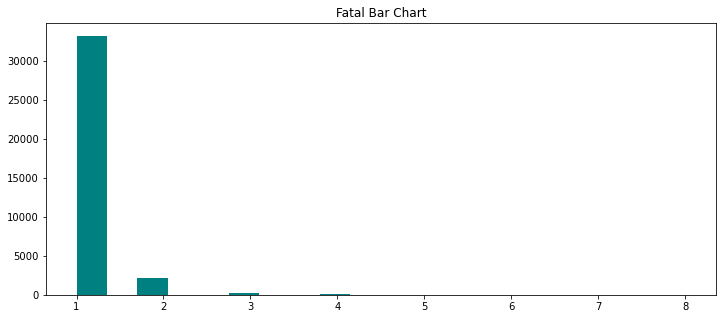

In [88]:
### The majority of the fatals seem to be distributed toward the left of the diagram
plt.figure(figsize=(12,5))
# Size

# Plot it
plt.hist(df_accident['fatals'], bins=20, color='teal');



plt.title('Fatal Bar Chart');


#### Fatals and State

In [91]:
df_accident.groupby('fatals')['statename'].value_counts()
# It looks like the most dangerous state is california maybe we dig deeper into what constitutes 'danger'

fatals  statename     
1       California        3319
        Texas             3246
        Florida           2906
        Georgia           1405
        North Carolina    1309
                          ... 
6       Georgia              1
        Kansas               1
        Texas                1
7       Texas                1
8       Colorado             1
Name: statename, Length: 188, dtype: int64

In [92]:
California_df = df_accident[(df_accident['statename'] == 'California')]

In [98]:
California_df.sort_values('fatals', ascending=False).head(3)

,state,statename,st_case,ve_total,ve_forms,pvh_invl,peds,persons,permvit,pernotmvit,...,arr_hour,arr_hourname,arr_min,arr_minname,hosp_hr,hosp_hrname,hosp_mn,hosp_mnname,fatals,drunk_dr
3870,6,California,61447,1,1,0,0,4,4,0,...,99,Unknown EMS Scene Arrival Hour,99,Unknown EMS Scene Arrival Minutes,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),4,0
5111,6,California,62708,1,1,0,0,4,4,0,...,99,Unknown EMS Scene Arrival Hour,99,Unknown EMS Scene Arrival Minutes,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),4,0
3575,6,California,61151,1,1,0,4,1,1,4,...,99,Unknown EMS Scene Arrival Hour,99,Unknown EMS Scene Arrival Minutes,99,Unknown,99,Unknown EMS Hospital Arrival Time,4,0


In [107]:
California_df.sort_values('arr_hour', ascending=True)

,state,statename,st_case,ve_total,ve_forms,pvh_invl,peds,persons,permvit,pernotmvit,...,arr_hour,arr_hourname,arr_min,arr_minname,hosp_hr,hosp_hrname,hosp_mn,hosp_mnname,fatals,drunk_dr
4560,6,California,62154,1,1,0,1,1,1,1,...,0,0:00am-0:59am,49,49,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),1,0
3773,6,California,61349,2,2,0,0,2,2,0,...,0,0:00am-0:59am,20,20,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),1,0
2994,6,California,60556,2,2,0,0,2,2,0,...,0,0:00am-0:59am,49,49,99,Unknown,0,0,2,0
3633,6,California,61209,1,1,0,1,1,1,1,...,0,0:00am-0:59am,27,27,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),1,0
3989,6,California,61568,1,1,0,0,2,2,0,...,0,0:00am-0:59am,34,34,99,Unknown,99,Unknown EMS Hospital Arrival Time,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3694,6,California,61270,1,1,0,1,1,1,1,...,99,Unknown EMS Scene Arrival Hour,99,Unknown EMS Scene Arrival Minutes,99,Unknown,99,Unknown EMS Hospital Arrival Time,1,0
3695,6,California,61271,1,1,0,1,1,1,1,...,99,Unknown EMS Scene Arrival Hour,99,Unknown EMS Scene Arrival Minutes,99,Unknown,99,Unknown EMS Hospital Arrival Time,1,0
3697,6,California,61273,1,1,0,0,1,1,0,...,99,Unknown EMS Scene Arrival Hour,99,Unknown EMS Scene Arrival Minutes,99,Unknown,99,Unknown EMS Hospital Arrival Time,1,0
3664,6,California,61240,1,1,0,0,1,1,0,...,99,Unknown EMS Scene Arrival Hour,99,Unknown EMS Scene Arrival Minutes,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),1,0


In [106]:
California_df.groupby('fatals')['drunk_dr'].value_counts(normalize=True)

fatals  drunk_dr
1       0           0.755047
        1           0.240735
        2           0.004218
2       0           0.609137
        1           0.375635
        2           0.015228
3       0           0.500000
        1           0.441176
        2           0.058824
4       0           0.750000
        1           0.250000
Name: drunk_dr, dtype: float64

### Sort values by most fatals


In [108]:
fatals = df_accident.sort_values(by='fatals', ascending=False)[:20]

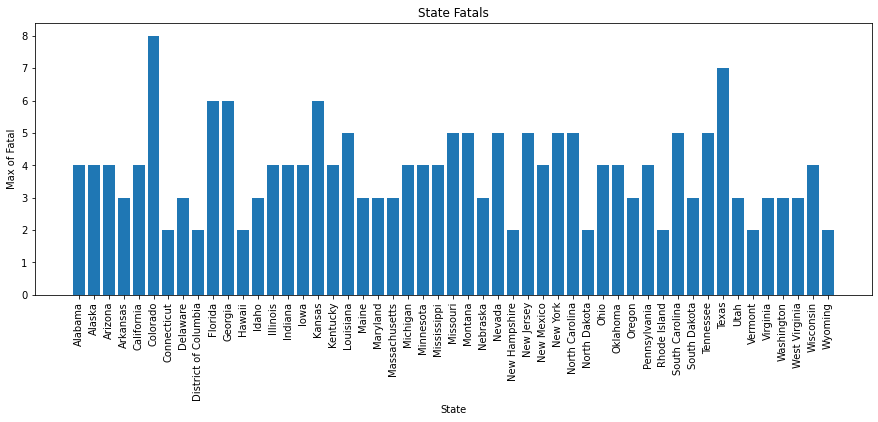

In [120]:
# Here we see the average total for fatals by state- most are coming in around 4
plt.figure(figsize=(15,5))
plt.bar(df_accident['statename'],
       df_accident['fatals'])
plt.xticks(rotation = 90)
plt.ylabel('Max of Fatal')
plt.xlabel('State')
plt.title("State Fatals");

#### Let's Check out the road owner

In [112]:
df_accident['rd_owner'].unique()

array([ 2,  4,  1,  3, 96, 98, 99, 62, 64, 60, 11, 25, 66, 31, 12, 27, 63,
       21, 26, 50, 80, 68, 32, 70], dtype=int64)

In [114]:
california_roadowner = df_accident[(df_accident['statename'] == 'California') & (df_accident['rd_owner']) >= 1]

In [115]:
california_roadowner

,state,statename,st_case,ve_total,ve_forms,pvh_invl,peds,persons,permvit,pernotmvit,...,arr_hour,arr_hourname,arr_min,arr_minname,hosp_hr,hosp_hrname,hosp_mn,hosp_mnname,fatals,drunk_dr
2458,6,California,60002,2,2,0,0,3,3,0,...,99,Unknown EMS Scene Arrival Hour,99,Unknown EMS Scene Arrival Minutes,99,Unknown,99,Unknown EMS Hospital Arrival Time,1,0
2459,6,California,60003,2,2,0,0,2,2,0,...,99,Unknown EMS Scene Arrival Hour,99,Unknown EMS Scene Arrival Minutes,99,Unknown,99,Unknown EMS Hospital Arrival Time,1,0
2460,6,California,60004,2,2,0,0,2,2,0,...,99,Unknown EMS Scene Arrival Hour,99,Unknown EMS Scene Arrival Minutes,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),1,0
2461,6,California,60005,2,2,0,0,5,5,0,...,99,Unknown EMS Scene Arrival Hour,99,Unknown EMS Scene Arrival Minutes,99,Unknown,99,Unknown EMS Hospital Arrival Time,1,0
2464,6,California,60008,3,3,0,0,5,5,0,...,99,Unknown EMS Scene Arrival Hour,99,Unknown EMS Scene Arrival Minutes,99,Unknown,99,Unknown EMS Hospital Arrival Time,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6009,6,California,63619,2,2,0,0,2,2,0,...,99,Unknown EMS Scene Arrival Hour,99,Unknown EMS Scene Arrival Minutes,99,Unknown,99,Unknown EMS Hospital Arrival Time,1,0
6010,6,California,63620,2,2,0,0,3,3,0,...,99,Unknown EMS Scene Arrival Hour,99,Unknown EMS Scene Arrival Minutes,99,Unknown,99,Unknown EMS Hospital Arrival Time,1,1
6011,6,California,63621,1,1,0,1,2,2,1,...,99,Unknown EMS Scene Arrival Hour,99,Unknown EMS Scene Arrival Minutes,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),1,0
6012,6,California,63622,1,1,0,0,1,1,0,...,18,6:00pm-6:59pm,55,55,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),1,0


In [117]:
california_roadowner['rd_owner'].sort_values()

2458     1
4504     1
4501     1
4500     1
4499     1
        ..
3452     1
3480     1
5829     3
4276    99
3449    99
Name: rd_owner, Length: 1513, dtype: int64

In [119]:
california_roadowner.groupby('fatals')['rd_owner'].value_counts()
#Here we see that for atleast in California - the most dangerous travel mode is by Highway

fatals  rd_owner
1       1           1376
        99             2
        3              1
2       1            112
3       1             18
4       1              4
Name: rd_owner, dtype: int64

#### Compare states

In [148]:
# lets take a look at the dnagers of driving in different states


In [156]:
df_accident.groupby('statename')['fatals'].value_counts()

statename  fatals
Alabama    1         786
           2          52
           3          12
           4           2
Alaska     1          44
                    ... 
Wisconsin  2          43
           3           2
           4           2
Wyoming    1         101
           2          13
Name: fatals, Length: 188, dtype: int64

190.24468085106383

In [158]:
df_accident.groupby('statename')['fatals'].agg(['count', 'mean'])

,count,mean
statename,,
Alabama,852,1.096244
Alaska,53,1.207547
Arizona,967,1.089969
Arkansas,585,1.090598
California,3558,1.081225
Colorado,574,1.083624
Connecticut,279,1.057348
Delaware,104,1.115385
District of Columbia,34,1.058824


#### What makes driving in florida so dangerous?

In [ ]:
### ares of interest are tway_id and route
### lets see how many accidents occur on each and how many vehicles pile up

In [161]:
df_wyoming = df_accident.loc[df_accident['statename'] == 'Wyoming', :]

In [162]:
df_wyoming[['tway_id']]

,tway_id
35652,I-80
35653,I-80 US-30
35654,US-237 S 3RD ST
35655,US-30 BI-80 E GRAND AVE
35656,SR-59
...,...
35761,CR-109
35762,US-89
35763,SR-137
35764,US-30 I-80 BUS E LINCOLNWAY


In [163]:
df_wyoming['tway_id'].unique()
#lets see if we can figure out which road is the most dangerous

array(['I-80', 'I-80 US-30', 'US-237 S 3RD ST', 'US-30 BI-80 E GRAND AVE',
       'SR-59', 'US-310 SR-789', 'SR-414', 'US-20-26',
       'SR-258 WYOMING BLVD', 'SR-319', 'SR-172', 'US-20/26/87',
       'I-80 / US-30', 'US-26 / US-287', 'CR-12', 'SR-154', 'CR-93',
       'SR-450', 'US-287  S 3RD ST', 'SR-351', 'US-30  E LINCOLNWAY',
       'SR-223 TERRY RANCH DR', 'SR-345', 'CR-1 IRVINE RD', 'METZ DR',
       'CR-134', 'US-16 US-20 SR-789', 'SR-530', 'US-16', 'US-85 BUS',
       'US-89', 'CR-408', 'US-14 US-16 US-20', 'US-26', 'SR-22', 'SR-251',
       'US-189 US-191', 'US-191', 'US-287 SR-789', 'EVENTS DR',
       'US-20 US-26', 'US-30 US-287', 'US-212', 'I-25 US-85 US-87',
       'I-90', 'US-20 US-26 US-87', 'I-25 US-87', 'SR-24',
       'CR-409 BLUE SKY RD', 'I-25 RAMP 17', 'CR-109S S GUERNSEY RD',
       'PINE ST', 'CR-120-1 TELEPHONE RD', 'US-26 WHALEN ST', 'SR-132',
       'CR-28', 'US-287', 'I-80 US-30 US-287', 'FRONTIER MALL DR',
       'FOREST SERVICE RD 876', 'SR-287-789', 'US

In [166]:
# Itlooks like i-80 is the most dangerous route
df_wyoming.groupby('fatals')['tway_id'].value_counts()

fatals  tway_id         
1       I-80                8
        I-80 US-30          5
        I-25                3
        I-90                3
        SR-132              3
                           ..
2       US-287              1
        US-287  S 3RD ST    1
        US-30 SR-89         1
        US-30 US-287        1
        US-89               1
Name: tway_id, Length: 88, dtype: int64

In [167]:
# lets take a closer look at i-80
df_wyoming[(df_wyoming['tway_id'] == 'I-80')]

,state,statename,st_case,ve_total,ve_forms,pvh_invl,peds,persons,permvit,pernotmvit,...,arr_hour,arr_hourname,arr_min,arr_minname,hosp_hr,hosp_hrname,hosp_mn,hosp_mnname,fatals,drunk_dr
35652,56,Wyoming,560001,1,1,0,0,2,2,0,...,7,7:00am-7:59am,30,30,99,Unknown,99,Unknown EMS Hospital Arrival Time,1,0
35662,56,Wyoming,560011,1,1,0,0,1,1,0,...,1,1:00am-1:59am,37,37,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),1,0
35672,56,Wyoming,560021,1,1,0,0,1,1,0,...,99,Unknown EMS Scene Arrival Hour,98,Unknown if Arrived,99,Unknown,98,Unknown if Transported,1,1
35674,56,Wyoming,560023,1,1,0,0,1,1,0,...,12,12:00pm-12:59pm,59,59,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),1,0
35686,56,Wyoming,560035,1,1,0,0,2,2,0,...,11,11:00am-11:59am,18,18,99,Unknown,99,Unknown EMS Hospital Arrival Time,1,0
35716,56,Wyoming,560065,1,1,0,0,1,1,0,...,99,Unknown EMS Scene Arrival Hour,98,Unknown if Arrived,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),1,0
35733,56,Wyoming,560083,3,3,0,0,4,4,0,...,20,8:00pm-8:59pm,42,42,99,Unknown,99,Unknown EMS Hospital Arrival Time,1,0
35740,56,Wyoming,560090,6,6,0,0,6,6,0,...,16,4:00pm-4:59pm,39,39,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),1,0


In [170]:
#Lets see if weather plays a role in accident patterns
df_wyoming[['weather']]

,weather
35652,1
35653,1
35654,1
35655,1
35656,10
...,...
35761,4
35762,1
35763,4
35764,1


In [172]:
df_wyoming['weather'].unique()

array([ 1, 10, 11,  4,  5,  2,  3,  6], dtype=int64)

In [171]:
df_wyoming.groupby('weather')['fatals'].agg(['count', 'mean'])

,count,mean
weather,,
1,91,1.120879
2,1,2.000000
3,1,1.000000
4,11,1.090909
5,1,1.000000
6,2,1.000000
10,6,1.000000
11,1,1.000000


In [175]:
df_wyoming.groupby('weather')['fatals'].value_counts()

weather  fatals
1        1         80
         2         11
2        2          1
3        1          1
4        1         10
         2          1
5        1          1
6        1          2
10       1          6
11       1          1
Name: fatals, dtype: int64

In [169]:
df_wyoming.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114 entries, 35652 to 35765
Data columns (total 80 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   state         114 non-null    int64  
 1   statename     114 non-null    object 
 2   st_case       114 non-null    int64  
 3   ve_total      114 non-null    int64  
 4   ve_forms      114 non-null    int64  
 5   pvh_invl      114 non-null    int64  
 6   peds          114 non-null    int64  
 7   persons       114 non-null    int64  
 8   permvit       114 non-null    int64  
 9   pernotmvit    114 non-null    int64  
 10  county        114 non-null    int64  
 11  countyname    114 non-null    object 
 12  city          114 non-null    int64  
 13  cityname      114 non-null    object 
 14  day           114 non-null    int64  
 15  dayname       114 non-null    int64  
 16  month         114 non-null    int64  
 17  monthname     114 non-null    object 
 18  year          114 non-nu

In [164]:
df_wyoming[['route']]

,route
35652,1
35653,1
35654,2
35655,2
35656,3
...,...
35761,4
35762,2
35763,3
35764,2


In [ ]:
df_wyoming[['tway_id']]

# Correlation Chart 

In [24]:
df_accident.corr()

,state,st_case,ve_total,ve_forms,pvh_invl,peds,persons,permvit,pernotmvit,county,...,weather,sch_bus,not_hour,not_min,arr_hour,arr_min,hosp_hr,hosp_mn,fatals,drunk_dr
state,1.000000,0.999986,0.002132,0.000546,0.004321,-0.054651,-0.003895,-0.003721,-0.052634,0.267884,...,0.093840,0.003259,0.061929,0.058871,0.073113,0.070297,-0.040521,-0.037540,0.000584,0.033658
st_case,0.999986,1.000000,0.002236,0.000624,0.004405,-0.054255,-0.003829,-0.003659,-0.052242,0.268991,...,0.093224,0.003199,0.063868,0.060721,0.075044,0.072138,-0.039324,-0.036379,0.000578,0.033472
ve_total,0.002132,0.002236,1.000000,0.927414,0.338424,-0.204354,0.631536,0.622845,-0.161039,0.013819,...,-0.022173,0.015563,-0.008226,-0.009710,-0.006649,-0.005580,-0.041900,-0.033069,0.130481,-0.023189
ve_forms,0.000546,0.000624,0.927414,1.000000,-0.038106,-0.238065,0.665099,0.668735,-0.232475,0.011161,...,-0.022846,0.017711,-0.011250,-0.013661,-0.010240,-0.010137,-0.044531,-0.036741,0.132417,-0.030830
pvh_invl,0.004321,0.004405,0.338424,-0.038106,1.000000,0.052968,0.013966,-0.018400,0.154626,0.008841,...,-0.001763,-0.002979,0.006324,0.008426,0.007998,0.010593,0.000092,0.004086,0.015459,0.015610
peds,-0.054651,-0.054255,-0.204354,-0.238065,0.052968,1.000000,-0.221193,-0.223874,0.958868,-0.020057,...,-0.027554,0.000547,0.070433,0.063555,0.071700,0.065588,0.043998,0.039447,-0.062247,-0.194928
persons,-0.003895,-0.003829,0.631536,0.665099,0.013966,-0.221193,1.000000,0.996115,-0.189258,0.008456,...,-0.030204,0.046587,-0.024323,-0.024829,-0.025549,-0.026043,-0.068591,-0.056525,0.284210,-0.012359
permvit,-0.003721,-0.003659,0.622845,0.668735,-0.018400,-0.223874,0.996115,1.000000,-0.216825,0.008672,...,-0.030001,0.046959,-0.024802,-0.025443,-0.026004,-0.026666,-0.069724,-0.057937,0.284496,-0.012794
pernotmvit,-0.052634,-0.052242,-0.161039,-0.232475,0.154626,0.958868,-0.189258,-0.216825,1.000000,-0.019719,...,-0.027159,-0.000262,0.068391,0.062270,0.069508,0.064226,0.044931,0.041601,-0.057668,-0.184322
county,0.267884,0.268991,0.013819,0.011161,0.008841,-0.020057,0.008456,0.008672,-0.019719,1.000000,...,0.065921,-0.005752,0.126787,0.116379,0.122436,0.115700,0.048933,0.045879,0.010390,-0.008209


# Weather Data Frame


In [29]:
weather_df = pd.read_csv('./data/weather.csv')

In [30]:
weather_df.columns = weather_df.columns.str.lower()

In [31]:
weather_df.head()

,state,statename,st_case,weather,weathername
0,1,Alabama,10001,1,Clear
1,1,Alabama,10002,2,Rain
2,1,Alabama,10003,2,Rain
3,1,Alabama,10004,10,Cloudy
4,1,Alabama,10005,2,Rain


# Cevent CSV

In [32]:
df_cevent = pd.read_csv('./data/cevent.csv')

In [34]:
df_cevent.columns = df_cevent.columns.str.lower()

In [35]:
df_cevent.head()

,state,statename,st_case,eventnum,vnumber1,aoi1,aoi1name,soe,soename,vnumber2,vnumber2name,aoi2,aoi2name
0,1,Alabama,10001,1,1,55,Non-Harmful Event,63,Ran Off Roadway - Right,5555,Non-Harmful Event,55,Non-Harmful Event
1,1,Alabama,10001,2,1,12,12 Clock Point,42,Tree (Standing Only),9999,Not a Motor Vehicle,77,Not a Motor Vehicle
2,1,Alabama,10001,3,1,12,12 Clock Point,42,Tree (Standing Only),9999,Not a Motor Vehicle,77,Not a Motor Vehicle
3,1,Alabama,10001,4,1,0,Non-Collision,1,Rollover/Overturn,9999,Not a Motor Vehicle,77,Not a Motor Vehicle
4,1,Alabama,10002,1,2,12,12 Clock Point,12,Motor Vehicle In-Transport,1,1,2,2 Clock Point


# CrashRF

In [36]:
df_crashrf = pd.read_csv('./data/crashrf.csv')

In [37]:
df_crashrf.columns = df_crashrf.columns.str.lower()

In [38]:
df_crashrf.head()

,state,statename,st_case,crashrf,crashrfname
0,1,Alabama,10001,0,None
1,1,Alabama,10002,0,None
2,1,Alabama,10003,0,None
3,1,Alabama,10004,0,None
4,1,Alabama,10005,0,None


# Column Names

In [ ]:
column_names_accident = ['state', 'peds', 've_total', 'persons', 'county', 'day', 'month', 'hour', 'minute', 'week', 'tway_id', 'route', 'rur_urb', 'rd_owner','nhs', 'sp_jur', 'milept', 'latitude', 'longitude', 'harm', 'man_coll', 'reljct1', 'reljct2', 'typ_int', 'rel_road', 'wrk_zone', 'lgt_cond', 'sch_bus', 'rail', 'not_hour', 'arr_hour', 'hosp_hr']

In [ ]:
col_name_cevent = ['eventnum', 'vnumber1', 'aoi1', 'soe', 'vnumber2', 'aoi2', ]

In [ ]:
col_name_weather = ['weather']

In [ ]:
col_name_crashrf = ['crashrf']